
# DoE Schools Trends

Below is a count of the number of schools that are partnered with CUNY Internship Program for internship service.



In [26]:
warning=F
library(tidyverse)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(ggpubr)
data <- read.csv("DoE Schools Trends.csv")
head(data)
glimpse(data)
names(data)[1] <- "Year"
data$Year <- lubridate::mdy(data$Year)

ï..Year,Amount,DBN,school.name,Borough,Zip
1/1/2017,"$1,486.00",25Q281,East-West School of International Studies,QUEENS,NY
1/1/2017,"$1,486.00",26Q566,"Queens High School of Teaching, Liberal Arts and the Sciences",QUEENS,NY
1/1/2017,"$1,486.00",14K558,Williamsburg High School for Architecture and Design,BROOKLYN,NY
1/1/2017,"$1,486.00",21K468,Kingsborough Early College School,BROOKLYN,NY
1/1/2017,"$1,531.00",12X129,M.S. 129 Academy for Independent Learning and Leadership,BRONX,NY
1/1/2017,"$1,486.00",12X521,The Metropolitan Soundview High School,BRONX,NY


Observations: 921
Variables: 6
$ ï..Year     <fct> 1/1/2017, 1/1/2017, 1/1/2017, 1/1/2017, 1/1/2017, 1/1/2...
$ Amount      <fct> "$1,486.00 ", "$1,486.00 ", "$1,486.00 ", "$1,486.00 ",...
$ DBN         <fct> 25Q281, 26Q566, 14K558, 21K468, 12X129, 12X521, 07X221,...
$ school.name <fct> "East-West School of International Studies", "Queens Hi...
$ Borough     <fct> QUEENS, QUEENS, BROOKLYN, BROOKLYN, BRONX, BRONX, BRONX...
$ Zip         <fct> NY, NY, NY, NY, NY, NY, NY, NY, NY, NY, NY, NY, NY, NY,...


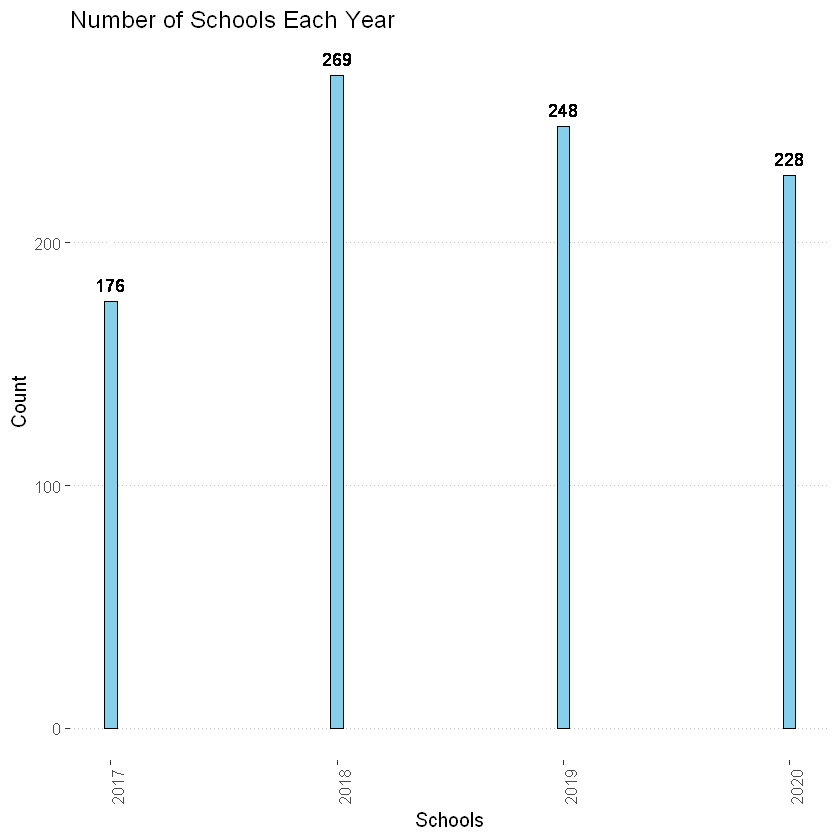

In [13]:
data5 <- data%>%
          group_by(Year)%>%
          mutate(sum_bor = n())



ggplot(data5, aes( x=Year, y = sum_bor))+
         geom_bar(stat = "identity",color ="black", position = "dodge", fill = "skyblue" ,width = 20)+
theme_pubclean() +geom_text(label = data5$sum_bor, y = data5$sum_bor +7)+
theme(legend.position = "NONE",axis.text.x = element_text(angle=90))+
labs(title = "Number of Schools Each Year", y="Count",x="Schools")

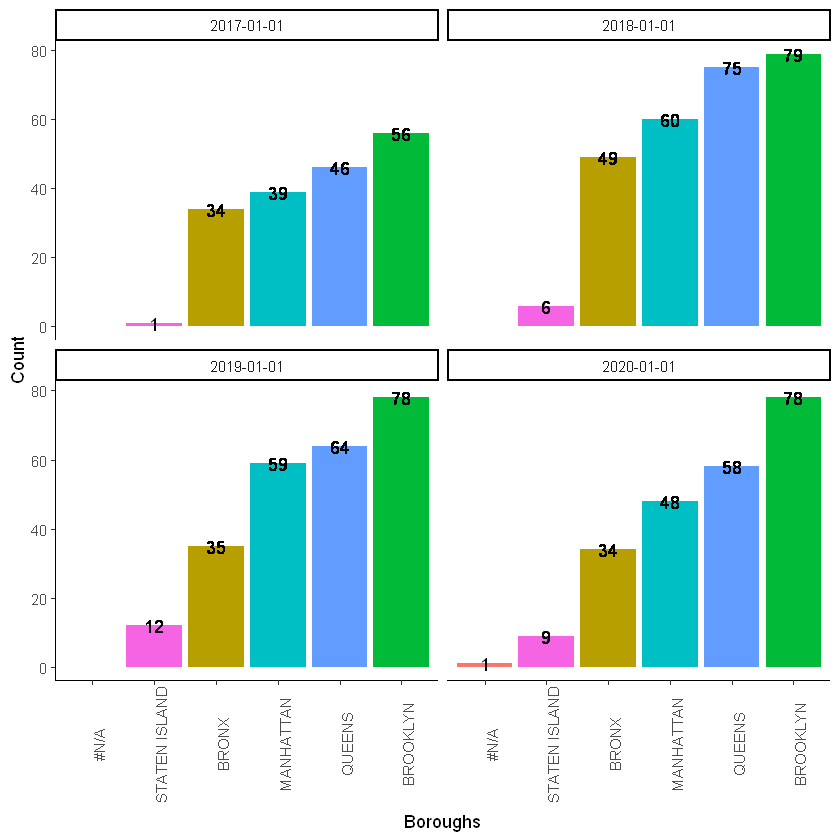

In [14]:
data2 <- data%>%
          group_by(Year, Borough)%>%
          mutate(sum_bor = n())
ggplot(data2, aes( x=fct_reorder(Borough, sum_bor), y = sum_bor, fill = Borough))+
geom_bar(stat = "identity", position = "dodge")+theme_classic()+geom_text(label = data2$sum_bor)+
facet_wrap(~Year)+theme(legend.position = "NONE",axis.text.x = element_text(angle=90))+ylab("Count")+xlab("Boroughs")


In [15]:
data3 <- data %>%
group_by(school.name)%>%
mutate(date_of_first_engagement= min(Year))%>%
ungroup()

data3 <- data3 %>%
 mutate(school_Status = case_when( Year > date_of_first_engagement ~ "Returning",
Year == date_of_first_engagement ~ "New",
 TRUE ~ "Other"))

The table below illustrates the number of “New” and “Returning” shools who seek internship services from CIP.  From the line graph, we can see that the number of returning schools continues to grow each year while the number of new schools does the opposite.


In [16]:
data4 <-  data3 %>%
group_by(lubridate::floor_date(`Year`,unit = 'year'))%>%
summarise(New_school = n_distinct(school.name[school_Status=="New"]),
Returning_schools= n_distinct(school.name[school_Status=="Returning"]))

In [21]:

kable(data4, col.names = c("Year", "New_Schools", "Returning_Schools"))%>%
kable_styling(bootstrap_options = c("striped", "hover", "condensed") , full_width = F, position = "left")%>%
as.character()%>%
display_html()

Year,New_Schools,Returning_Schools
2017-01-01,176,0
2018-01-01,142,127
2019-01-01,101,147
2020-01-01,57,171


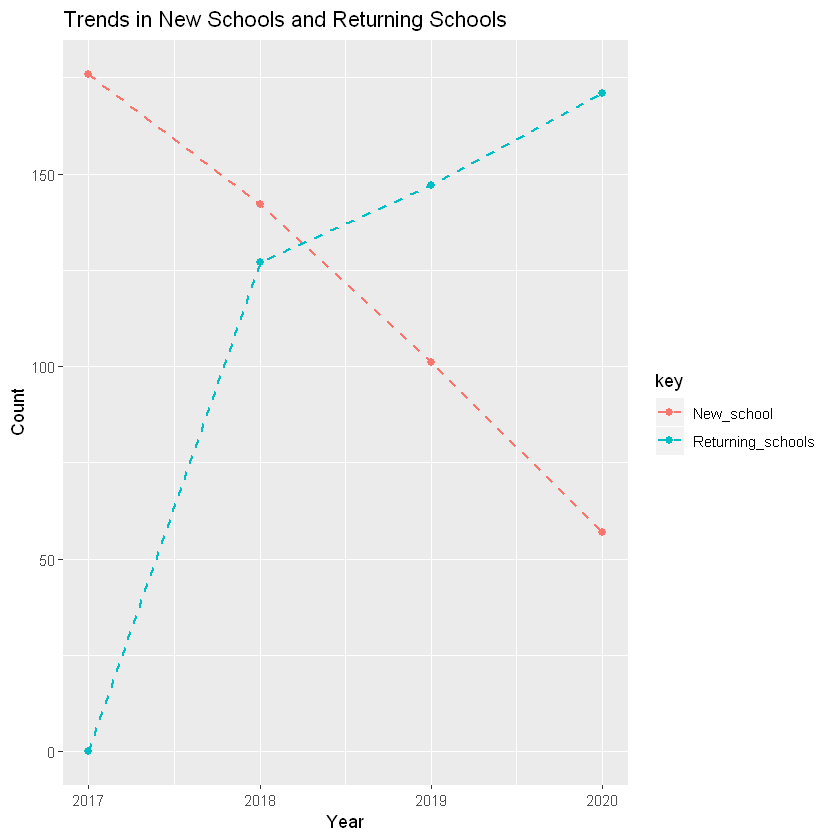

In [23]:
 names(data4)[1]<- "Year"
 
data4 <- tidyr::gather(data4, key= key, value = values, 2:3)
ggplot(data = data4, aes(x = Year,y =values, group = key,color=key ))+
  geom_line(linetype = "dashed", size=0.6)+geom_point(size = 2) +
labs(title = "Trends in New Schools and Returning Schools", x= 'Year',y='Count')+theme_replace()
